In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "",
                             username = "",
                             password = "",
                             database = "")

cur = db.cursor()


# List all unique cities where customers are located.

In [215]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the numbers of orders placed in 2017.

In [41]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are", data[0][0]

('Total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [388]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales 
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [201]:
query = """ select sum(case when payment_installments > 1 then 1 
else 0 end)/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()
"The percentage of orders that were paid in installments is", data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('49.4176'))

# Count the number of customers from each state.

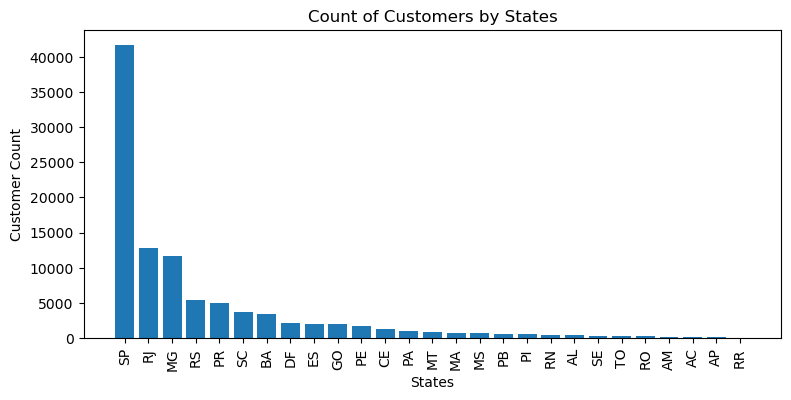

In [209]:
query = """ select customer_state ,count(customer_id) from customers 
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State", "No. of Customers"])
df = df.sort_values(by = "No. of Customers", ascending = False)

plt.figure(figsize = (9,4))
plt.bar(df["State"], df["No. of Customers"])
plt.xticks(rotation = 90)

plt.xlabel("States")
plt.ylabel("Customer Count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

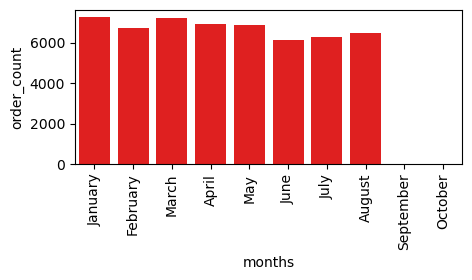

In [276]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])

o = ["January","February","March","April","May","June","July","August","September","October"]
plt.figure(figsize = (5,2))  # it should be called before barplot
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "red")

plt.xticks(rotation = 90)
#ax.bar_label(ax.containers[0]) # for lables

plt.show()

# Find the average number of products per order, grouped by customer city.

In [247]:
query = """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc 
from orders join order_items on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select upper(customers.customer_city), round(avg(count_per_order.oc),2) average_orders 
from customers join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City", "Average Products/Orders"])
df.head(10)

,Customer City,Average Products/Orders
0,PADRE CARVALHO,7.00
1,CELSO RAMOS,6.50
2,DATAS,6.00
3,CANDIDO GODOI,6.00
4,MATIAS OLIMPIO,5.00
5,MORRO DE SAO PAULO,4.00
6,TEIXEIRA SOARES,4.00
7,CURRALINHO,4.00
8,CIDELANDIA,4.00
9,PICARRA,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [290]:
query = """ select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales 
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category order by sales desc """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Product Category", "Revenue Percentage"])
df.head(10)
#plt.pie(df["Revenue Percentage"], labels = df["Product Category"]) # for pie chart
#plt.show()

,Product Category,Revenue Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [312]:
query = """ select products.product_category, count(order_items.product_id),
round(avg(order_items.price),2) 
from products join order_items on products.product_id = order_items.product_id
group by products.product_category """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Order Count", "Price"])

arr1 = df["Order Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2]) # 1 for proportional & -1 for inversely proportional
print("The correlation between product price and the number of times a product has been purchased is", round(a[0][1],4))

The correlation between product price and the number of times a product has been purchased is -0.1063


# Calculate the total revenue generated by each seller, and rank them by revenue.

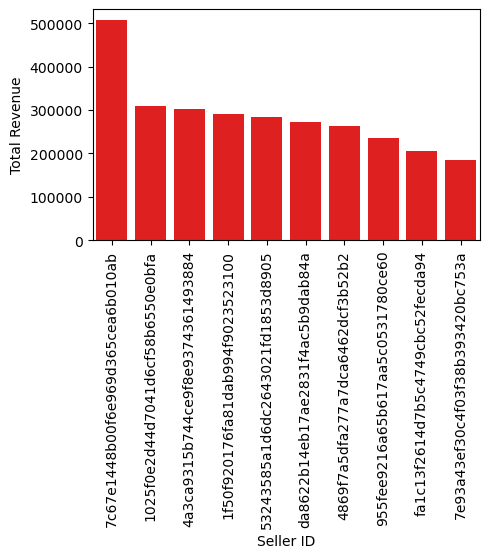

In [386]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from (
select order_items.seller_id, round(sum(payment_value),2) revenue 
from order_items join payments on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Seller ID", "Total Revenue", "Rank"])
df = df.head(10)

plt.figure(figsize = (5,3))
sns.barplot(x = "Seller ID", y = "Total Revenue", data = df, color = "red")
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [402]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp, 
round(payments.payment_value,2) as payment
from payments join orders on payments.order_id = orders.order_id) as a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer ID", "Time", "Payment", "Moving Average"])
df.head(50)

,Customer ID,Time,Payment,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.740000
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410000
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.420000
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350000
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010000
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800000
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400000
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.590000
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230000
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.710000


# Calculate the cumulative sales per month for each year.

In [420]:
query = """ select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales 
from
(select year(orders.order_purchase_timestamp) as years, 
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id
group by years, months 
order by years, months) as a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Months", "Payment", "Cumulative Sales"])
df

,Years,Months,Payment,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [444]:
query = """ with a as (
select year(orders.order_purchase_timestamp) as years, 
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id
group by years 
order by years) 

select years, ((payment - lag(payment, 1) over(order by years)) /
lag(payment, 1) over(order by years)) * 100 from a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "YoY % growth"])
df

,Years,YoY % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [463]:
query = """ with a as 
(select customers.customer_id, 
min(orders.order_purchase_timestamp) first_order
from customers join orders on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders on orders.customer_id = a.customer_id 
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count(distinct a.customer_id) / count(distinct b.customer_id))
from a left join b on a.customer_id = b.customer_id """

cur.execute(query)

data = cur.fetchall()
data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

In [505]:
query = """ select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years, orders.customer_id,
round(sum(payments.payment_value),2) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value) desc) d_rank
from orders join payments on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a
where d_rank <= 3 """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "id", "payment", "rank"])
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3
